# Mistral 8x7B Instruct with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using Mistral 8x7B Instruct with prompt from 2/13/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import mistral_instructions_v213
MODEL_ID = "mistral.mixtral-8x7b-instruct-v0:1"
SYSTEM_PROMPT = mistral_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 0
INFO:root:Completed: 3
INFO:root:Completed: 1
INFO:root:Completed: 4
INFO:root:Completed: 2
INFO:root:Completed: 7
INFO:root:Completed: 5
INFO:root:Completed: 6
INFO:root:Completed: 8
INFO:root:Completed: 9
INFO:root:Completed: 12
INFO:root:Completed: 14
INFO:root:Completed: 10
INFO:root:Completed: 13
INFO:root:Completed: 11
INFO:root:Completed: 15
INFO:root:Completed: 16
INFO:root:Completed: 17
INFO:root:Completed: 18
INFO:root:Completed: 19
INFO:root:Completed: 21
INFO:root:Completed: 23
INFO:root:Completed: 22
INFO:root:Completed: 20
INFO:root:Completed: 24
INFO:root:Completed: 25
INFO:root:Completed: 27
INFO:root:Completed: 26
INFO:root:Completed: 28
INFO:root:Completed: 29


CPU times: user 1min 10s, sys: 4.74 s, total: 1min 14s
Wall time: 12min 47s


[{'0001.91306_cites_88061.txt': {'model': 'mistral.mixtral-8x7b-instruct-v0:1',
   'input_tokens': 3250,
   'output_tokens': 71,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The Acting Case does not explicitly or implicitly negate the Target Case. It only questions and limits certain aspects of the Target Case without overruling it entirely.',
   'raw_results': ' json\n{\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The Acting Case does not explicitly or implicitly negate the Target Case. It only questions and limits certain aspects of the Target Case without overruling it entirely."\n}'}},
 {'0004.91306_cites_88240.txt': {'model': 'mistral.mixtral-8x7b-instruct-v0:1',
   'input_tokens': 2386,
   'output_tokens': 75,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage does not provide explicit or implicit negative actions related to the Target Case. The Target Case is only mentioned in the context of other cases and is not direct

In [6]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,mistral.mixtral-8x7b-instruct-v0:1,3250.0,71.0,no,0.95,The Acting Case does not explicitly or implici...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
1,0004.91306_cites_88240.txt,mistral.mixtral-8x7b-instruct-v0:1,2386.0,75.0,no,0.95,The passage does not provide explicit or impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
2,0002.91306_cites_88994.txt,mistral.mixtral-8x7b-instruct-v0:1,2933.0,77.0,no,0.95,The passage does not contain Explicit or Impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
3,0005.91306_cites_88693.txt,mistral.mixtral-8x7b-instruct-v0:1,2391.0,81.0,no,0.95,The passage does not provide explicit or impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
4,0003.91306_cites_87633.txt,mistral.mixtral-8x7b-instruct-v0:1,2432.0,109.0,no,0.95,The passage discusses the case of Texas v. Whi...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."


## Save the raw prediction results

In [7]:
prediction_df.to_csv("predictions/4.mistral/1.mistral_8x7B_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [8]:
prediction_df["prediction"].isna().sum()

34

In [9]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/4.mistral/1.mistral_8x7B_v213_prompt.csv")

In [10]:
retry = prediction_df[prediction_df["prediction"].isna()]
len(retry)

26

In [11]:
%%time
retry_predictions = predict(retry, MODEL_ID, SYSTEM_PROMPT)
retry_predictions[:2]

ERROR:root:No valid JSON block found in response text. Response:  Passage 1:

INFO:root:Completed: 346
INFO:root:Completed: 333
INFO:root:Completed: 356
INFO:root:Completed: 452
INFO:root:Completed: 479
INFO:root:Completed: 478
ERROR:root:JSON parsing error: Extra data: line 1 column 296 (char 295). Response json str: {
  "overruled": "no",
  "confidence": 0.95,
  "rationale": "The passage discusses the Target Case but does not show any Explicit or Implicit Negative Actions. The passage only mentions that other courts have dissented from the Target Case, which does not mean the Acting Case overrules it."
}

Passage 2:
{
  "overruled": "yes",
  "confidence": 0.99,
  "rationale": "The passage explicitly states that the Target Case is overruled due to Explicit Negative Actions. The court states that the decision in Henry v. Dick Co., <targetCase>224 U.S. 1</targetCase>, must be regarded as overruled."
}

Passage 3:
{
  "overruled": "no",
  "confidence": 0.95,
  "rationale": "The passage d

CPU times: user 1.92 s, sys: 159 ms, total: 2.08 s
Wall time: 20.4 s


[{'0352.104380_cites_97674.txt': {'model': 'mistral.mixtral-8x7b-instruct-v0:1',
   'input_tokens': 3429,
   'output_tokens': 7,
   'prediction': None,
   'confidence': None,
   'rationale': None,
   'raw_results': ' Passage 1:\n'}},
 {'0331.103927_cites_95840.txt': {'model': 'mistral.mixtral-8x7b-instruct-v0:1',
   'input_tokens': 5563,
   'output_tokens': 77,
   'prediction': 'no',
   'confidence': 0.99,
   'rationale': 'The Target Case is not overruled in the passage. The passage only mentions the Target Case in the context of its prior decisions and does not take any explicit or implicit negative actions against it.',
   'raw_results': ' json\n{\n  "overruled": "no",\n  "confidence": 0.99,\n  "rationale": "The Target Case is not overruled in the passage. The passage only mentions the Target Case in the context of its prior decisions and does not take any explicit or implicit negative actions against it."\n}'}}]

In [12]:
retry_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in retry_predictions 
    for filename, details in prediction.items()
])
retry_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0352.104380_cites_97674.txt,mistral.mixtral-8x7b-instruct-v0:1,3429.0,7.0,None,NaN,None,Passage 1:\n
1,0331.103927_cites_95840.txt,mistral.mixtral-8x7b-instruct-v0:1,5563.0,77.0,no,0.99,The Target Case is not overruled in the passag...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
2,0356.2764117_cites_103736.txt,mistral.mixtral-8x7b-instruct-v0:1,4864.0,81.0,no,0.95,The passage does not contain Explicit or Impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
3,0453.106576_cites_103522.txt,mistral.mixtral-8x7b-instruct-v0:1,3263.0,95.0,no,0.95,The passage does not provide enough informatio...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
4,0489.107252_cites_104108.txt,mistral.mixtral-8x7b-instruct-v0:1,5075.0,70.0,no,0.95,The Acting Case does not explicitly or implici...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."


In [13]:
retry_df["prediction"].isna().sum()

7

In [14]:
comb_prediction_df = prediction_df.copy()
comb_prediction_df.set_index("filename", inplace=True)
retry_df.set_index("filename", inplace=True)
comb_prediction_df = comb_prediction_df.mask(comb_prediction_df['prediction'].isna(), retry_df)
comb_prediction_df.reset_index(inplace=True)

In [15]:
prediction_df = comb_prediction_df

In [16]:
len(prediction_df)

1084

In [17]:
prediction_df["prediction"].isna().sum()

7

In [18]:
prediction_df.to_csv("predictions/4.mistral/1.mistral_8x7B_v213_prompt.csv", index=False)

In [19]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/4.mistral/1.mistral_8x7B_v213_prompt.csv")

In [20]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [21]:
assert len(df) == len(prediction_df)

In [22]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,mistral.mixtral-8x7b-instruct-v0:1,3250.0,71.0,no,0.95,The Acting Case does not explicitly or implici...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,mistral.mixtral-8x7b-instruct-v0:1,2933.0,77.0,no,0.95,The passage does not contain Explicit or Impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,mistral.mixtral-8x7b-instruct-v0:1,2432.0,109.0,no,0.95,The passage discusses the case of Texas v. Whi...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,mistral.mixtral-8x7b-instruct-v0:1,2386.0,75.0,no,0.95,The passage does not provide explicit or impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,mistral.mixtral-8x7b-instruct-v0:1,2391.0,81.0,no,0.95,The passage does not provide explicit or impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."


# Run evaluation

In [23]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [24]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [25]:
eval_df["prediction"].value_counts()

prediction
no     885
yes    199
Name: count, dtype: int64

In [26]:
eval_df["input_tokens"].sum()

4047350.0

In [27]:
eval_df["output_tokens"].sum()

101617.0

In [28]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [29]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.91      0.86      0.89       935
         Yes       0.36      0.48      0.41       149

    accuracy                           0.81      1084
   macro avg       0.63      0.67      0.65      1084
weighted avg       0.84      0.81      0.82      1084



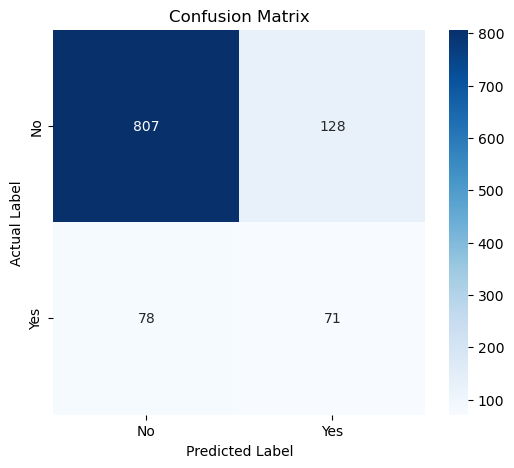

In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.81
Precision: 0.36
Recall: 0.48
F-score: 0.41
Specificity: 0.86
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 71
True negatives: 807
False positives: 128
False negatives: 78


In [32]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

128

In [33]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

78

# Save the evaluation df

In [34]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,mistral.mixtral-8x7b-instruct-v0:1,3250.0,71.0,no,0.95,The Acting Case does not explicitly or implici...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,mistral.mixtral-8x7b-instruct-v0:1,2933.0,77.0,no,0.95,The passage does not contain Explicit or Impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,mistral.mixtral-8x7b-instruct-v0:1,2432.0,109.0,no,0.95,The passage discusses the case of Texas v. Whi...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,mistral.mixtral-8x7b-instruct-v0:1,2386.0,75.0,no,0.95,The passage does not provide explicit or impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,mistral.mixtral-8x7b-instruct-v0:1,2391.0,81.0,no,0.95,The passage does not provide explicit or impli...,"json\n{\n ""overruled"": ""no"",\n ""confidence""..."


In [35]:
eval_df.to_csv("predictions/4.mistral/1.mistral_8x7B_v213_prompt_eval.csv", index=False)